In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster', font_scale = 2) # style
sns.set_theme() # style
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})# style
sns.set(rc = {'figure.figsize':(15,8)}) # fig size

In [2]:
cab = pd.read_csv("Cab_Data.csv")
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab.shape[0]

359392

In [4]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [6]:
# Function for annotation 
def annotation(): 
    x_axis=plt.gca()
    for px in x_axis.patches:
        x_axis.text(px.get_x() + px.get_width()/2, px.get_height(), '%d' % int(px.get_height()),fontsize=13,color='black',rotation = 45,ha='center',va='bottom')
  

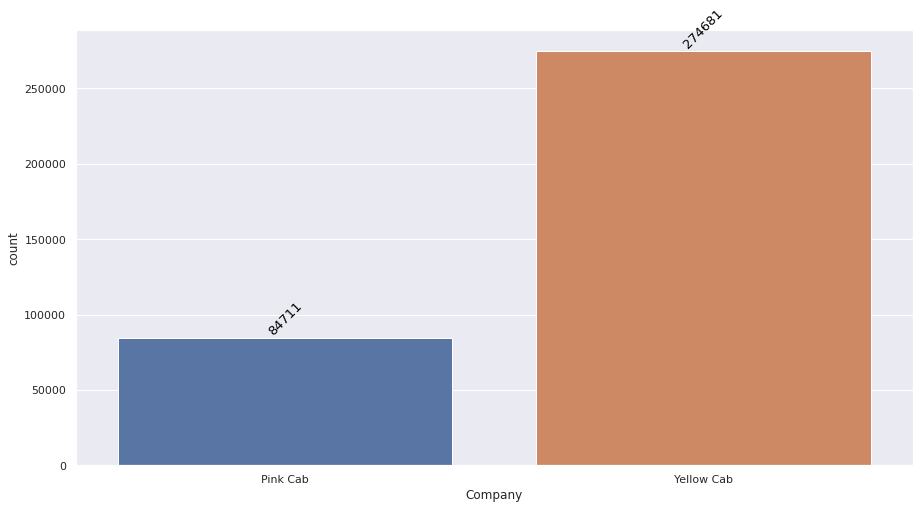

In [7]:
# analysisng company 
ax = sns.countplot(x = cab["Company"]) 
annotation()
plt.show()

In [8]:
counts=cab.Company.value_counts() 
counts

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

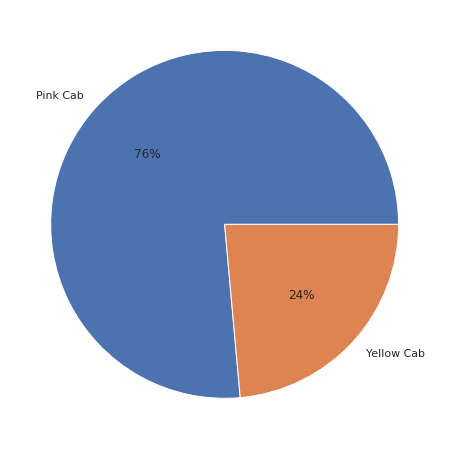

In [10]:

label = ["Pink Cab","Yellow Cab"]
palette_color = sns.color_palette('dark')  

plt.pie(counts, labels=label, autopct='%.0f%%')
  

plt.show()

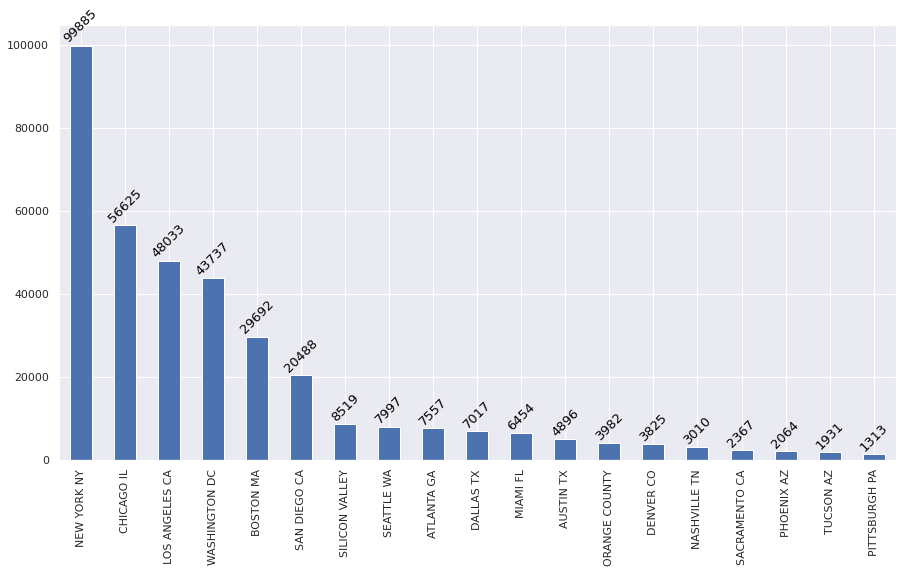

In [11]:
cab.City.value_counts().plot(kind='bar')
annotation()

In [12]:
cab.groupby(["City","Company"])["Company"].count()

City            Company   
ATLANTA GA      Pink Cab       1762
                Yellow Cab     5795
AUSTIN TX       Pink Cab       1868
                Yellow Cab     3028
BOSTON MA       Pink Cab       5186
                Yellow Cab    24506
CHICAGO IL      Pink Cab       9361
                Yellow Cab    47264
DALLAS TX       Pink Cab       1380
                Yellow Cab     5637
DENVER CO       Pink Cab       1394
                Yellow Cab     2431
LOS ANGELES CA  Pink Cab      19865
                Yellow Cab    28168
MIAMI FL        Pink Cab       2002
                Yellow Cab     4452
NASHVILLE TN    Pink Cab       1841
                Yellow Cab     1169
NEW YORK NY     Pink Cab      13967
                Yellow Cab    85918
ORANGE COUNTY   Pink Cab       1513
                Yellow Cab     2469
PHOENIX AZ      Pink Cab        864
                Yellow Cab     1200
PITTSBURGH PA   Pink Cab        682
                Yellow Cab      631
SACRAMENTO CA   Pink Cab       1334
 

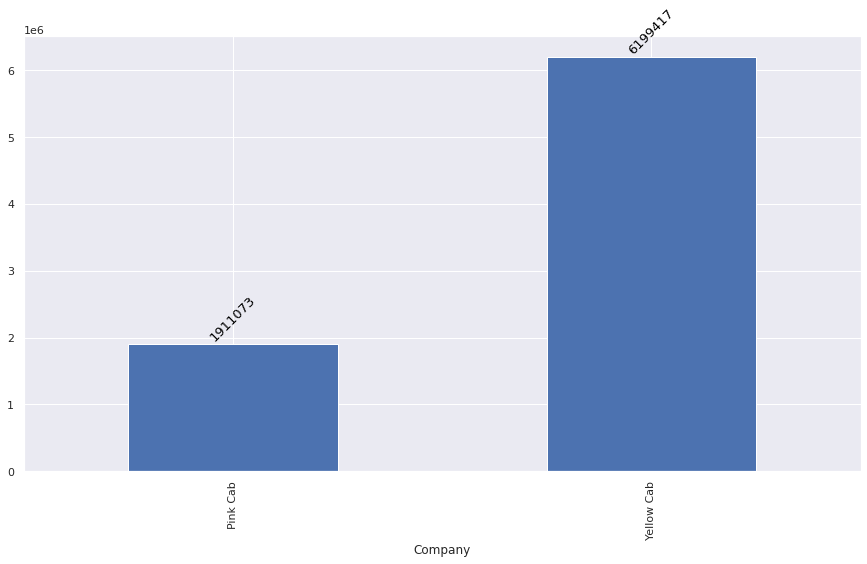

In [13]:
cab.groupby(["Company"])["KM Travelled"].sum().plot(kind='bar')
annotation()


In [14]:
cab["profit"] = cab["Price Charged"] - cab["Cost of Trip"]

In [15]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


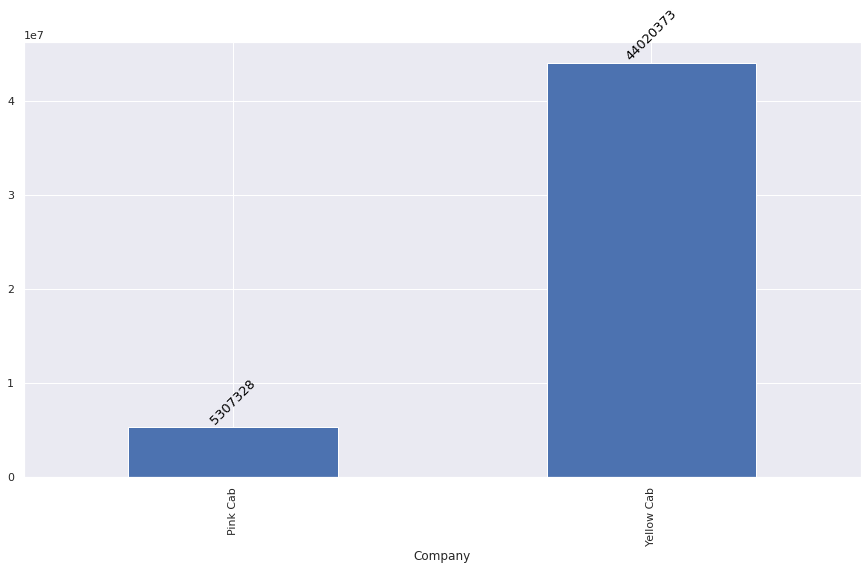

In [16]:
cab.groupby(["Company"])["profit"].sum().plot(kind='bar')
annotation()


In [17]:
cab.groupby(["Company","City"])["profit"].sum()

Company     City          
Pink Cab    ATLANTA GA        9.605008e+04
            AUSTIN TX         1.474453e+05
            BOSTON MA         2.620017e+05
            CHICAGO IL        3.187225e+05
            DALLAS TX         2.473011e+04
            DENVER CO         4.058494e+04
            LOS ANGELES CA    1.125732e+06
            MIAMI FL          1.623012e+05
            NASHVILLE TN      6.428453e+04
            NEW YORK NY       1.511474e+06
            ORANGE COUNTY     1.019958e+05
            PHOENIX AZ        3.559639e+04
            PITTSBURGH PA     1.710774e+04
            SACRAMENTO CA     5.532401e+04
            SAN DIEGO CA      6.378898e+05
            SEATTLE WA        1.127813e+05
            SILICON VALLEY    3.402505e+05
            TUCSON AZ         5.928957e+04
            WASHINGTON DC     1.937664e+05
Yellow Cab  ATLANTA GA        7.463828e+05
            AUSTIN TX         3.792557e+05
            BOSTON MA         1.506718e+06
            CHICAGO IL     

**CITY**

In [18]:
city = pd.read_csv("City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [19]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [20]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [21]:
def convert(value):
       value = value.replace(',', '')
       return int(value)
city['Population'].apply(convert)

0     8405837
1     1955130
2     1595037
3     1339155
4     1177609
5     1030185
6      959307
7      943999
8      942908
9      814885
10     754233
11     698371
12     671238
13     631442
14     629591
15     545776
16     542085
17     418859
18     327225
19     248968
Name: Population, dtype: int64

In [22]:
city['Users'].apply(convert)

0     302149
1     164468
2     144132
3      17675
4      27247
5      12994
6      69995
7       6133
8      22157
9      24701
10     12421
11     14978
12     25063
13      5712
14    213609
15      7044
16      3643
17    127001
18      9270
19     80021
Name: Users, dtype: int64

In [23]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [24]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [25]:
city['Population'] = city['Population'].str.replace('[,]', '', regex=True)
city['Population'] = pd.to_numeric(city['Population'])
city['Population']

0     8405837
1     1955130
2     1595037
3     1339155
4     1177609
5     1030185
6      959307
7      943999
8      942908
9      814885
10     754233
11     698371
12     671238
13     631442
14     629591
15     545776
16     542085
17     418859
18     327225
19     248968
Name: Population, dtype: int64

In [26]:
city['Users'] = city['Users'].str.replace('[,]', '', regex=True)
city['Users'] = pd.to_numeric(city['Users'])
city['Users']

0     302149
1     164468
2     144132
3      17675
4      27247
5      12994
6      69995
7       6133
8      22157
9      24701
10     12421
11     14978
12     25063
13      5712
14    213609
15      7044
16      3643
17    127001
18      9270
19     80021
Name: Users, dtype: int64

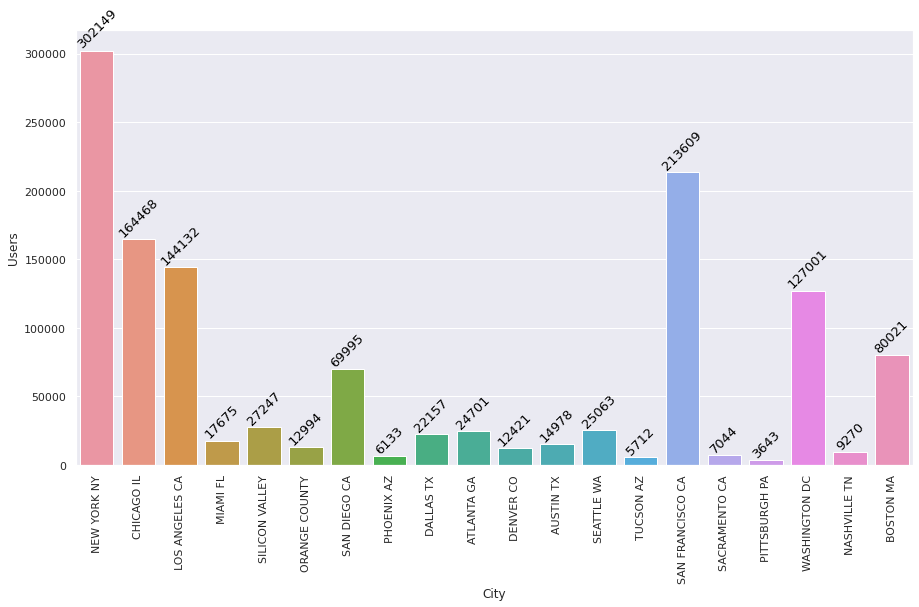

In [27]:
sns.barplot(x=city['City'],y=city['Users'])
plt.xticks(rotation='vertical')
annotation()
plt.show()


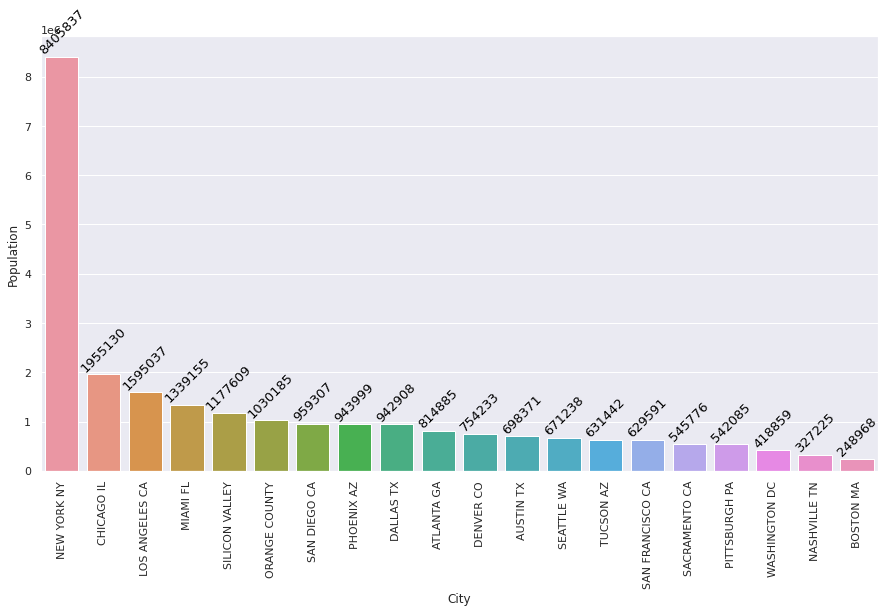

In [28]:
sns.barplot(x=city['City'],y=city['Population'])
plt.xticks(rotation='vertical')
annotation()
plt.show()

In [32]:
city["cap_usage %"]= (city['Users'] /city['Population']) * 100 


In [33]:
city

,City,Population,Users,cap_usage,cap_usage %
0,NEW YORK NY,8405837,302149,3.594514,3.594514
1,CHICAGO IL,1955130,164468,8.412126,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279,9.036279
3,MIAMI FL,1339155,17675,1.319862,1.319862
4,SILICON VALLEY,1177609,27247,2.313756,2.313756
5,ORANGE COUNTY,1030185,12994,1.261327,1.261327
6,SAN DIEGO CA,959307,69995,7.296413,7.296413
7,PHOENIX AZ,943999,6133,0.649683,0.649683
8,DALLAS TX,942908,22157,2.349858,2.349858
9,ATLANTA GA,814885,24701,3.031225,3.031225


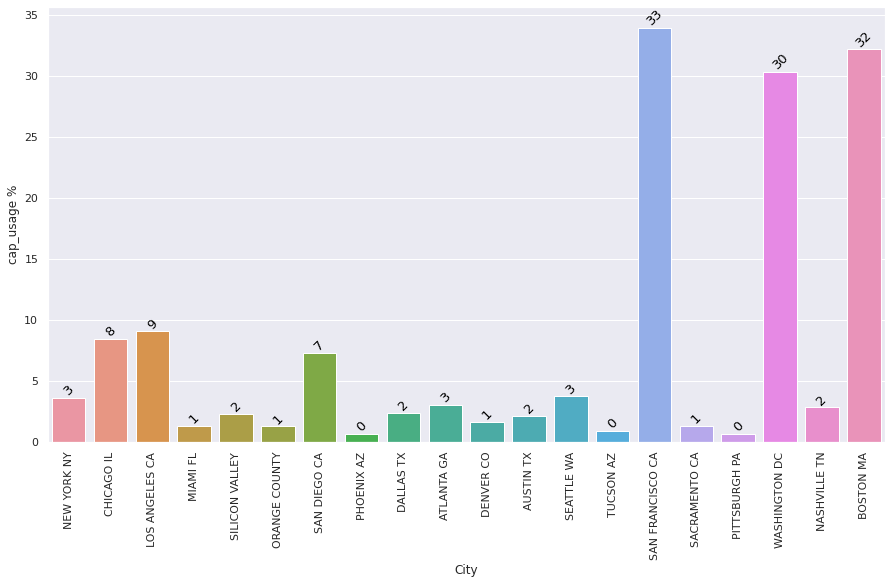

In [34]:
sns.barplot(x=city['City'],y=city["cap_usage %"])
plt.xticks(rotation='vertical')
annotation()
plt.show()

**CUSTOMER_ID**

In [36]:
customer = pd.read_csv("Customer_ID.csv")
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [37]:
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [38]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [39]:
customer.shape

(49171, 4)

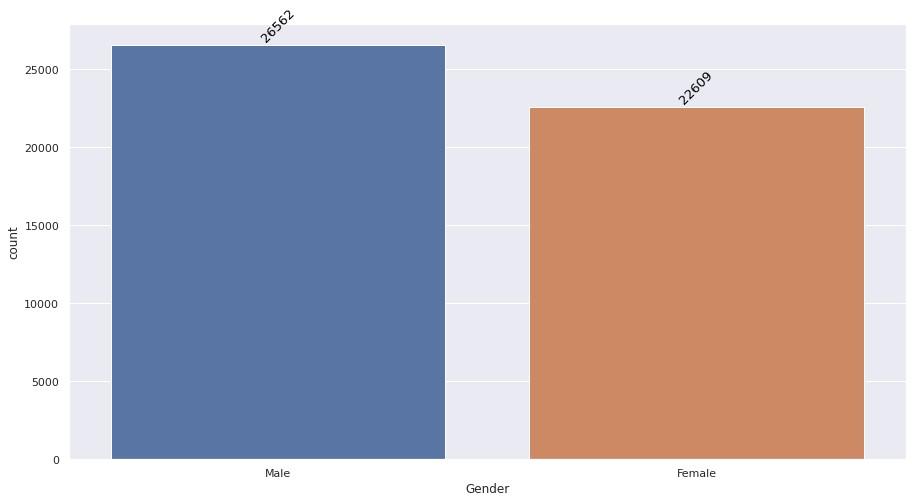

In [40]:
ax = sns.countplot(x = customer["Gender"]) 
annotation()
plt.show()

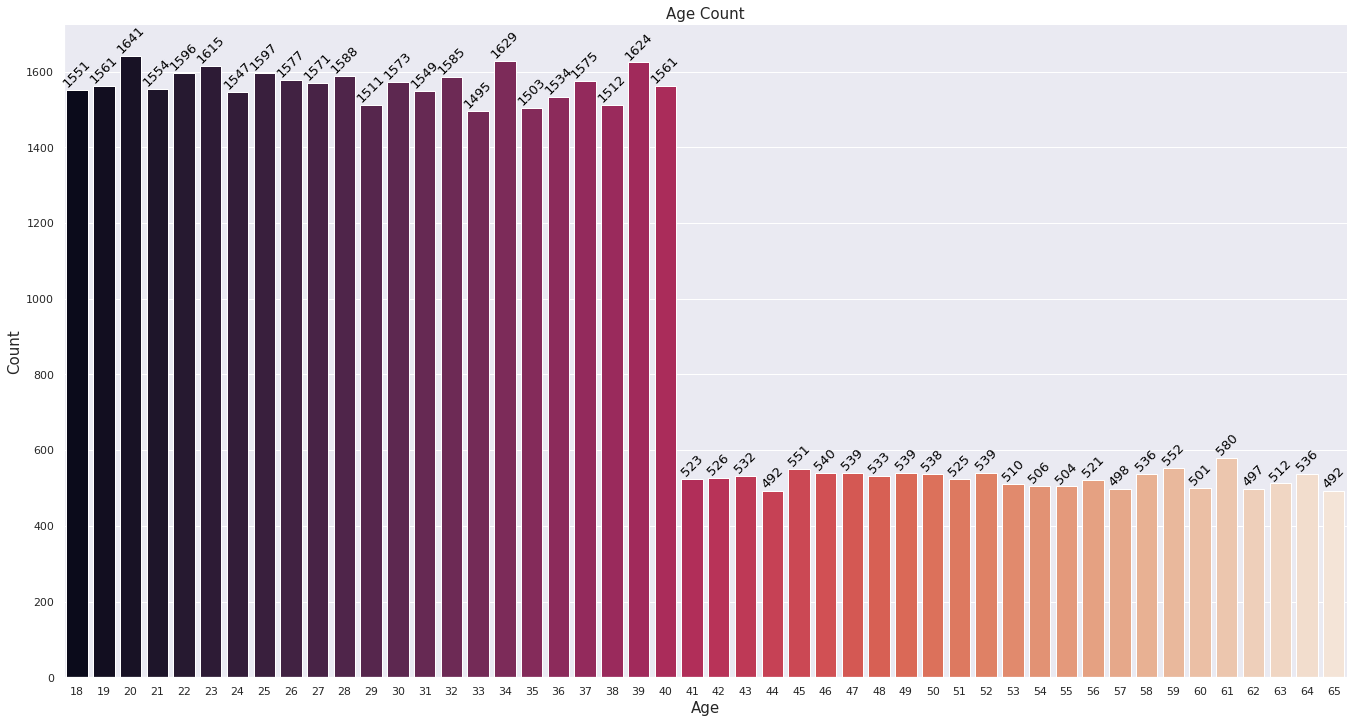

In [41]:
fig, axis = plt.subplots()  
fig.set_size_inches(23, 12) 
sns.countplot(x = 'Age', data = customer,palette="rocket") 
axis.set_xlabel('Age', fontsize=15) 
axis.set_ylabel('Count', fontsize=15)
axis.set_title('Age Count', fontsize=15) 
sns.despine()
annotation()

In [42]:
transaction = pd.read_csv("Transaction_ID.csv")
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [43]:
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [44]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [45]:
transaction.shape[0]

440098

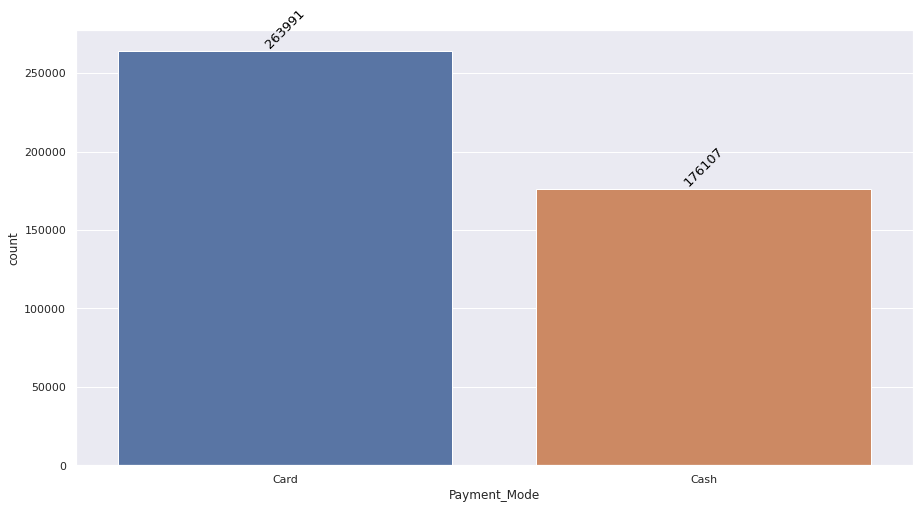

In [46]:
ax = sns.countplot(x = transaction["Payment_Mode"]) 
annotation()
plt.show()

In [47]:
# MERGE

In [48]:
data= cab.merge(transaction, on= 'Transaction ID').merge(customer, on ='Customer ID').merge(city, on = 'City')
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,cap_usage,cap_usage %
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,814885,24701,3.031225,3.031225
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,814885,24701,3.031225,3.031225
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,814885,24701,3.031225,3.031225
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,814885,24701,3.031225,3.031225
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,814885,24701,3.031225,3.031225


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   profit              359392 non-null  float64
 8   Customer ID         359392 non-null  int64  
 9   Payment_Mode        359392 non-null  object 
 10  Gender              359392 non-null  object 
 11  Age                 359392 non-null  int64  
 12  Income (USD/Month)  359392 non-null  int64  
 13  Population          359392 non-null  int64  
 14  Users               359392 non-null  int64  
 15  cap_usage           359392 non-nul

In [50]:
data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Age,Income (USD/Month),Population,Users,cap_usage,cap_usage %
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,137.253198,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267,10.668662,10.668662
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,160.311840,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020,10.633114,10.633114
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,-220.060000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,0.649683,0.649683
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,28.012000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000,3.594514,3.594514
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,81.962000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000,7.296413,7.296413
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,190.030000,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000,9.036279,9.036279
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,1463.966000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,32.141078,32.141078


In [51]:
print(data.corr())

                    Transaction ID  Date of Travel  KM Travelled  \
Transaction ID            1.000000        0.993030     -0.001429   
Date of Travel            0.993030        1.000000     -0.001621   
KM Travelled             -0.001429       -0.001621      1.000000   
Price Charged            -0.052902       -0.055559      0.835753   
Cost of Trip             -0.003462       -0.004484      0.981848   
profit                   -0.087130       -0.090672      0.462768   
Customer ID              -0.016912       -0.017653      0.000389   
Age                      -0.001267       -0.001346     -0.000369   
Income (USD/Month)       -0.001570       -0.001368     -0.000544   
Population                0.023868        0.022102     -0.002311   
Users                     0.013526        0.011780     -0.000428   
cap_usage                -0.022612       -0.023539      0.002305   
cap_usage %              -0.022612       -0.023539      0.002305   

                    Price Charged  Cost of Trip

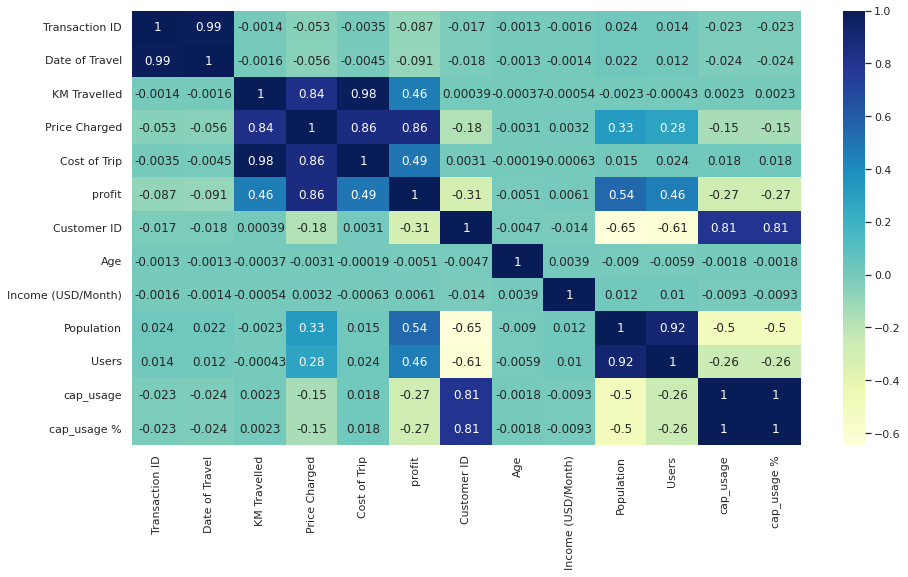

In [52]:

  
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

In [53]:
# changing date time format
a = data['Date of Travel'].to_list()

from_date = pd.Timestamp('1899-12-29')

dates = [from_date + pd.DateOffset(date_offset) for date_offset in a]

data['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [54]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,cap_usage,cap_usage %
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,814885,24701,3.031225,3.031225
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,814885,24701,3.031225,3.031225
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,814885,24701,3.031225,3.031225
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,814885,24701,3.031225,3.031225
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,814885,24701,3.031225,3.031225


In [55]:
 # seperate year and months from date columns
data['month']= data['Date of Travel'].dt.month

data['Year'] = data['Date of Travel'].dt.year

In [56]:
data['month_name'] = data['Date of Travel'].dt.month_name() # name the each month

In [57]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,cap_usage,cap_usage %,month,Year,month_name
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,814885,24701,3.031225,3.031225,1,2016,January
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,814885,24701,3.031225,3.031225,7,2018,July
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,814885,24701,3.031225,3.031225,11,2018,November
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,814885,24701,3.031225,3.031225,1,2016,January
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,814885,24701,3.031225,3.031225,4,2018,April


In [58]:
data.to_csv('cap_data.csv')

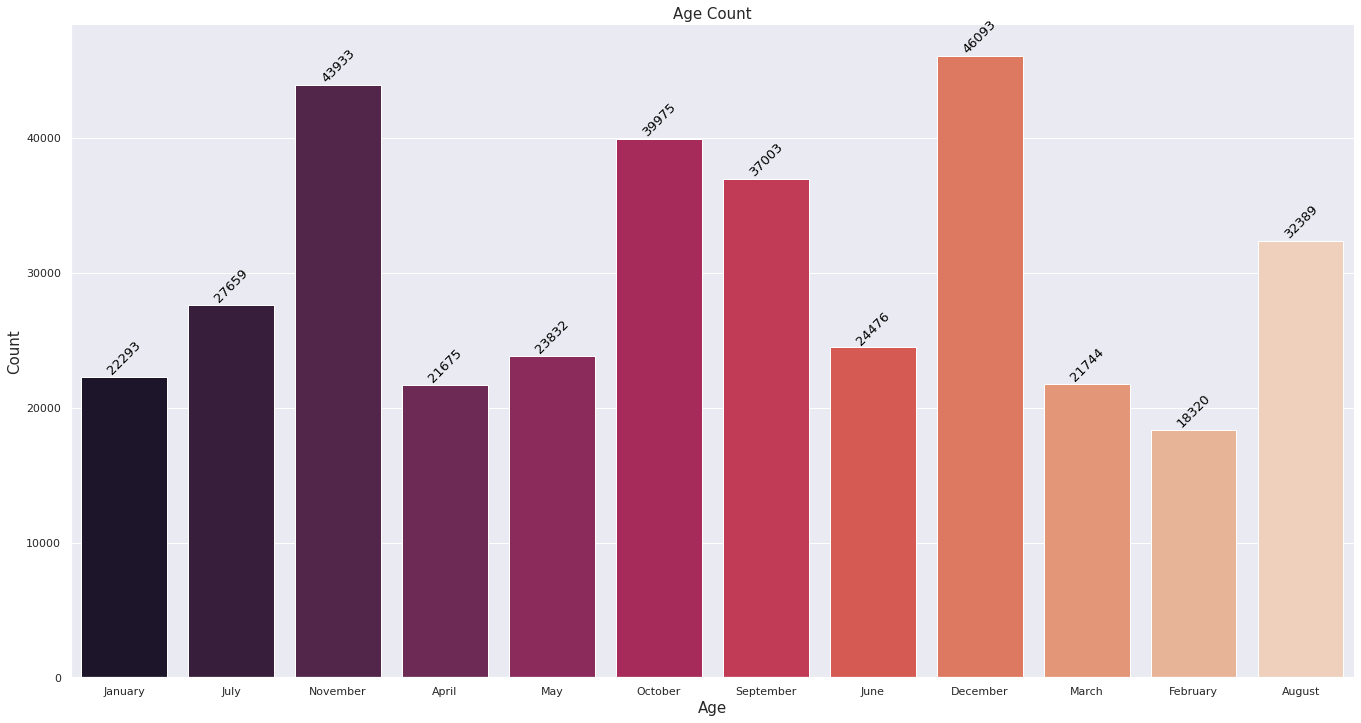

In [59]:
fig, axis = plt.subplots()  
fig.set_size_inches(23, 12) ### size of chart
sns.countplot(x = 'month_name', data = data,palette="rocket") ### countplot, age from 18 to 95
axis.set_xlabel('Age', fontsize=15) ### x axis
axis.set_ylabel('Count', fontsize=15) ###  y axis
axis.set_title('Age Count', fontsize=15) ### title of this chart 
sns.despine()
annotation()

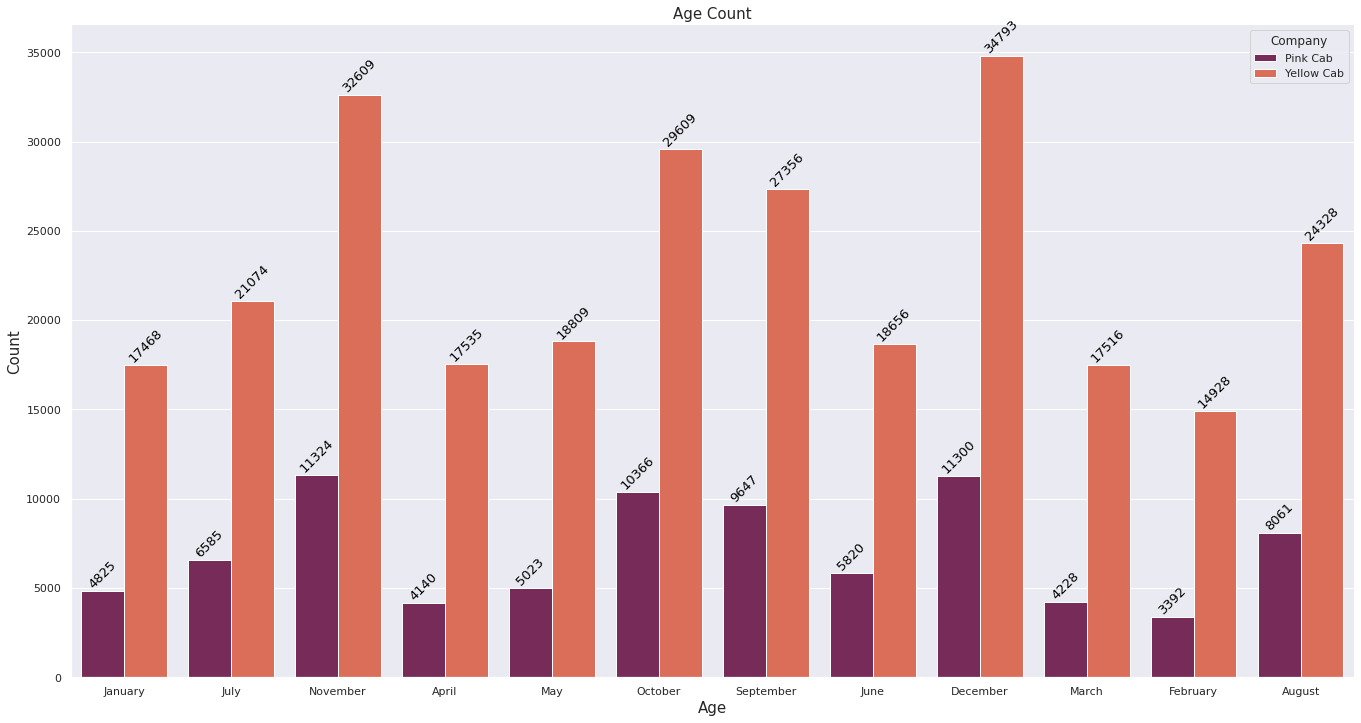

In [60]:
fig, axis = plt.subplots()  
fig.set_size_inches(23, 12) ### size of chart
sns.countplot(x = 'month_name', data = data,palette="rocket", hue= "Company") 
axis.set_xlabel('Age', fontsize=15) ### x axis
axis.set_ylabel('Count', fontsize=15) ###  y axis
axis.set_title('Age Count', fontsize=15) ### title of this chart 
sns.despine()
annotation()

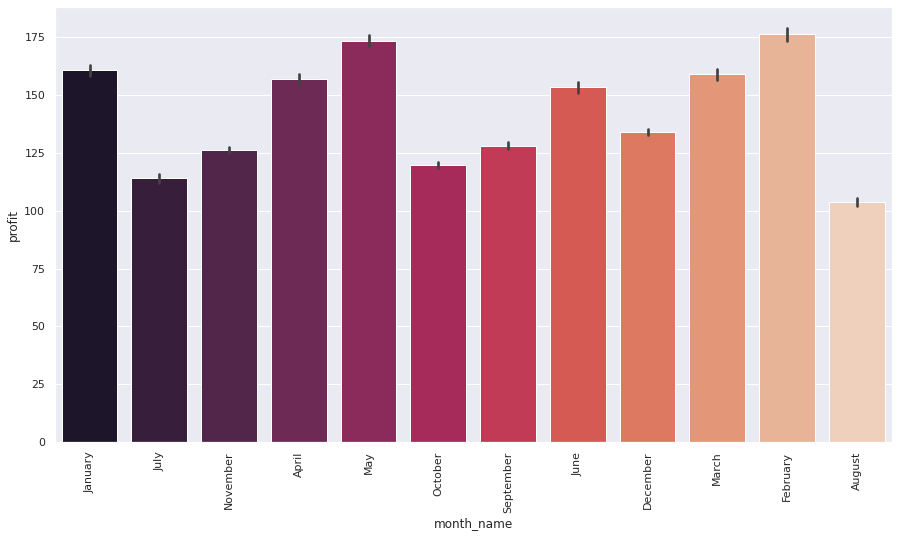

In [61]:
sns.barplot(x=data['month_name'],y= data['profit'],palette="rocket")
plt.xticks(rotation='vertical')
plt.show()

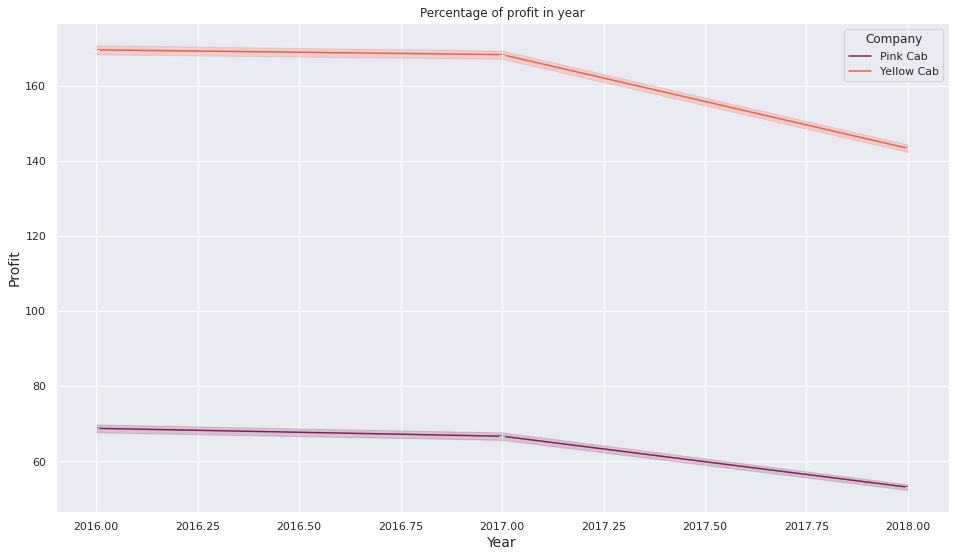

In [62]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='profit', hue="Company", data=data, marker='+', palette="rocket")
plt.xlabel("Year", size=14)
plt.ylabel("Profit", size=14)
plt.title("Percentage of profit in year")
plt.show()

In [63]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,cap_usage,cap_usage %,month,Year,month_name
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,814885,24701,3.031225,3.031225,1,2016,January
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,814885,24701,3.031225,3.031225,7,2018,July
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,814885,24701,3.031225,3.031225,11,2018,November
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,814885,24701,3.031225,3.031225,1,2016,January
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,814885,24701,3.031225,3.031225,4,2018,April


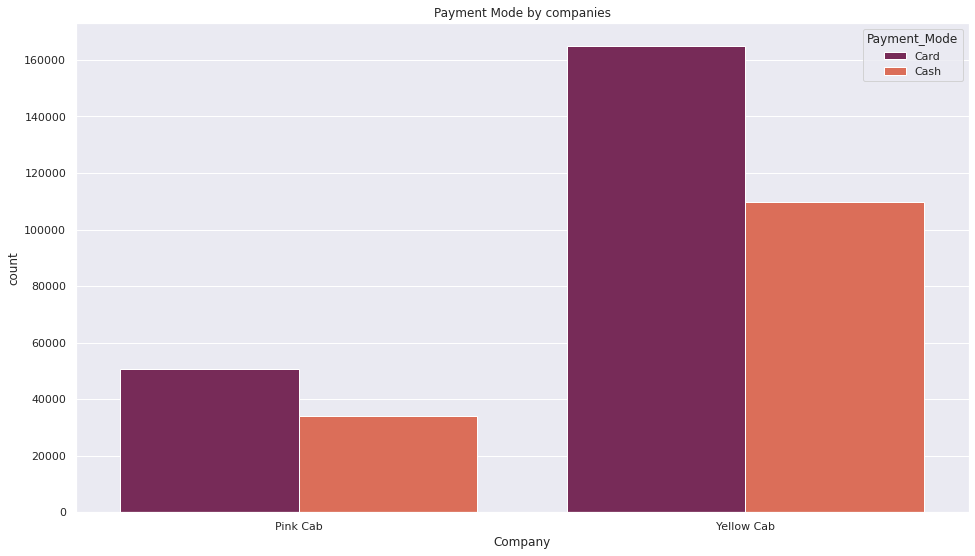

In [66]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=data, palette="rocket")
plt.title('Payment Mode by companies')
plt.show()

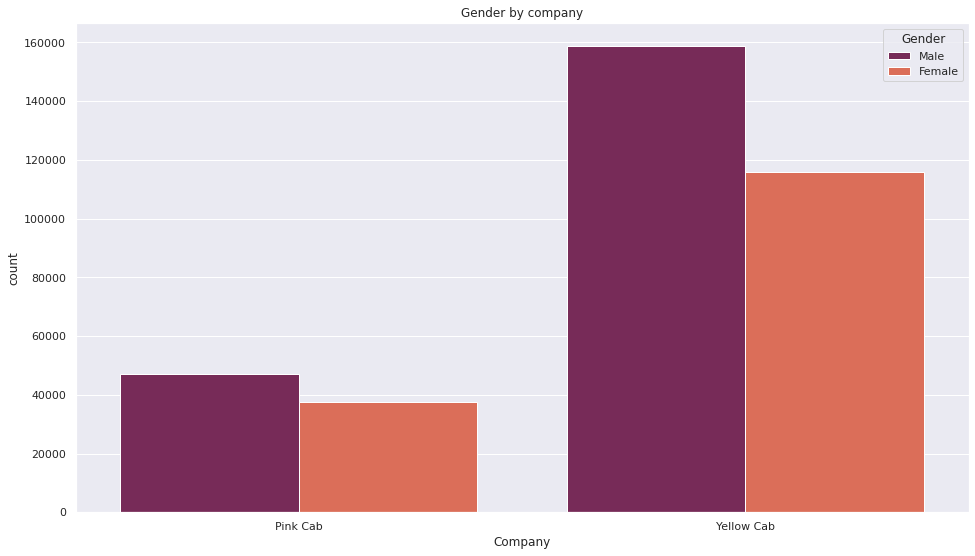

In [67]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Gender", data=data, palette="rocket")
plt.title('Gender by company')
plt.show()

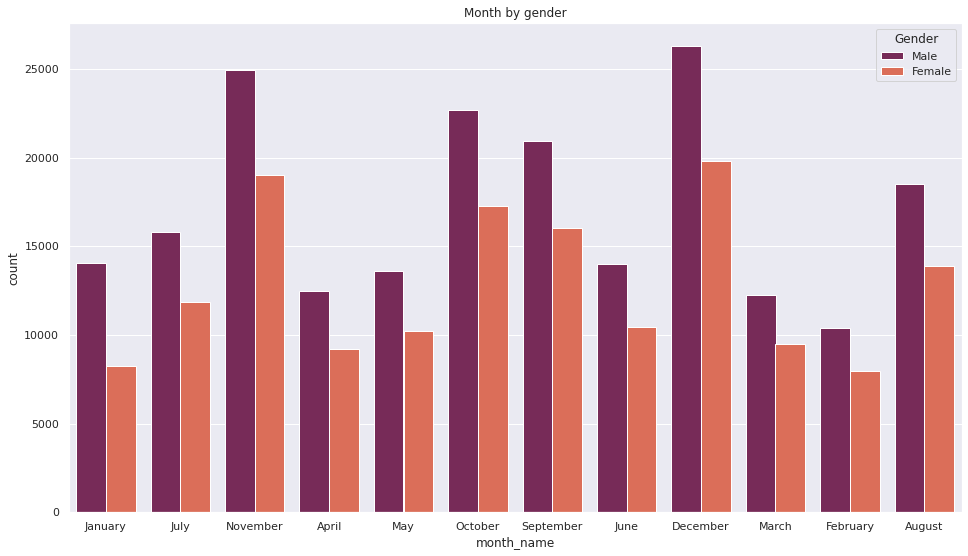

In [65]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="month_name", hue="Gender", data=data, palette="rocket")
plt.title('Month by gender')
plt.show()

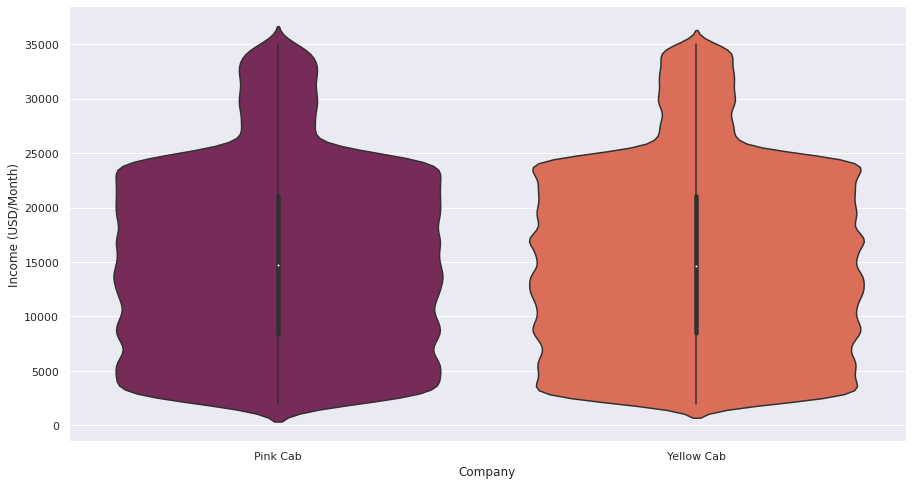

In [68]:
sns.violinplot(x ="Company",
             y = "Income (USD/Month)",
             style ="event",palette="rocket",
             data = data)

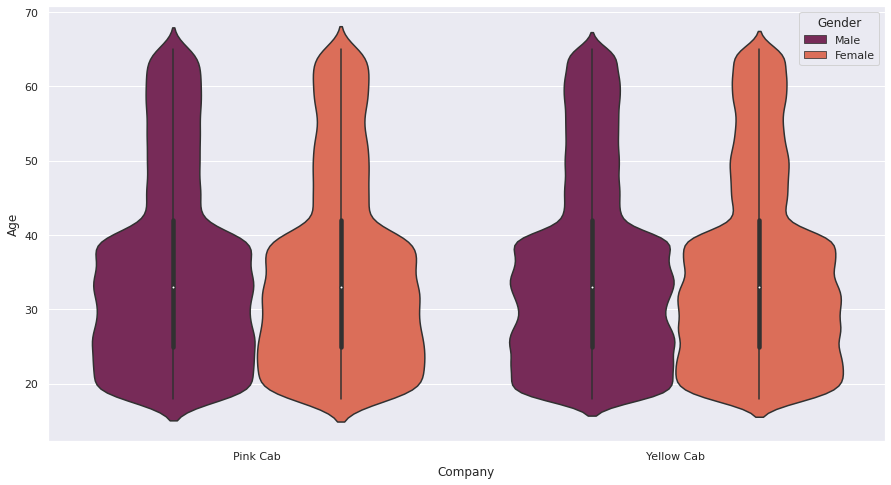

In [69]:
sns.violinplot(x ="Company",
             y = "Age",
             hue= "Gender",
             style ="event",palette="rocket",
             data = data)

**Hypothesis Testing**

1) is population of city and usage of cap are co related with each other ?

  if P value is greater than 0.05, it is independent  or else dependent 

In [75]:
import matplotlib.pyplot as plt
FirstSample = data['Population']
SecondSample = data['Users']

In [82]:
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
print()
if p > 0.05:
    print('Population and Usage are independent samples')
else:
    print('Population and Usage are dependent samples : both are co relation with each other')

stat=0.893, p=0.000000

Population and Usage are dependent samples : both are co relation with each other


2) is there price of cab is increase when more KMs are travelled ?

In [80]:

FirstSample = data['KM Travelled']
SecondSample = data['Price Charged']
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
print()
if p > 0.05:
    print('Cost is not increased when people travel more KMs')
else:
    print('Cost is increased when people travel more KMs')

stat=0.893, p=0.000000

Cost is increased when people travel more KMs


3) is High income persons are using car more often?

In [83]:
FirstSample = data['Income (USD/Month)']
SecondSample = data['KM Travelled']
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
print()
if p > 0.05:
    print('Person who earn more money are not  travelling more')
else:
    print('Persons who earn more money are travelling more')

stat=-0.000, p=0.803737

Person who earn more money are not  travelling more


4) is there gender making any impact of companies profit?

In [100]:
# H0 : There is no significant difference ( null hypothesis).
# H1 : There is significant difference (alternative hypothesis)

Pink cab

In [94]:
from scipy import stats
FirstSample = data[(data.Gender=='Male')&(data.Company=='Pink Cab')].groupby('Transaction ID').profit.mean()
secondSample= data[(data.Gender=='Female')&(data.Company=='Pink Cab')].groupby('Transaction ID').profit.mean()

_, p_value = stats.ttest_ind(FirstSample.values,
                             secondSample.values,
                             equal_var=True)

print('P value is :', p_value)
print()

if(p_value > 0.05):
    print('We accept null hypothesis (H0) that there is no significant difference b/w Gender and pink cab profit')
else:
    print('We accept alteranative hypothesis (H1) that there is significant difference b/w Gender and pink cab profit')

P value is : 0.11515305900425798

We accept null hypothesis (H0) that there is no significant difference b/w Gender and pink cab profit


Yellow Cab

In [95]:
from scipy import stats
FirstSample = data[(data.Gender=='Male')&(data.Company=='Yellow Cab')].groupby('Transaction ID').profit.mean()
secondSample= data[(data.Gender=='Female')&(data.Company=='Yellow Cab')].groupby('Transaction ID').profit.mean()

_, p_value = stats.ttest_ind(FirstSample.values,
                             secondSample.values,
                             equal_var=True)

print('P value is :', p_value)
print()

if(p_value > 0.05):
    print('We accept null hypothesis (H0) that there is no significant difference b/w Gender and Yellow Cab profit')
else:
    print('We accept alteranative hypothesis (H1) that there is significant difference b/w Gender and pink cab profit')

P value is : 6.060473042494144e-25

We accept alteranative hypothesis (H1) that there is significant difference b/w Gender and pink cab profit


5) Age categories are making any impact on profit ? 

Pink Cab

In [98]:
from scipy import stats
FirstSample = data[(data.Age <= 50)&(data.Company=='Pink Cab')].groupby('Transaction ID').profit.mean()
secondSample= data[(data.Age >= 50)&(data.Company=='Pink Cab')].groupby('Transaction ID').profit.mean()

_, p_value = stats.ttest_ind(FirstSample.values,
                             secondSample.values,
                             equal_var=True)

print('P value is :', p_value)
print()

if(p_value > 0.05):
    print('We accept null hypothesis (H0) that there is no significant difference b/w age and pink cab profit')
else:
    print('We accept alteranative hypothesis (H1) that there is significant difference b/w age and pink cab profit')

P value is : 0.3905344473325604

We accept null hypothesis (H0) that there is no significant difference b/w age and pink cab profit


Yellow Cab

In [99]:
from scipy import stats
FirstSample = data[(data.Age <= 50)&(data.Company=='Yellow Cab')].groupby('Transaction ID').profit.mean()
secondSample= data[(data.Age >= 50)&(data.Company=='Yellow Cab')].groupby('Transaction ID').profit.mean()

_, p_value = stats.ttest_ind(FirstSample.values,
                             secondSample.values,
                             equal_var=True)

print('P value is :', p_value)
print()

if(p_value > 0.05):
    print('We accept null hypothesis (H0) that there is no significant difference b/w age and pink cab profit')
else:
    print('We accept alteranative hypothesis (H1) that there is significant difference b/w age and pink cab profit')

P value is : 3.893841736668538e-05

We accept alteranative hypothesis (H1) that there is significant difference b/w age and pink cab profit
